# Regression Wine Quality

## Importando bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from sklearn.preprocessing  import  StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import kurtosis,skew,normaltest,jarque_bera

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carregando a base de dados

In [0]:
raw = pd.read_csv('winequality-white.csv', delimiter=';')

In [0]:
df = raw.copy()

## Breve manipulação na base de dados

In [0]:
df.columns = raw.columns.str.replace(' ','_')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [0]:
df_X = df.copy()

In [0]:
#padronizando variáveis numéricas
scaler = StandardScaler()

dependent_cols = df_X.drop('quality', axis = 1).columns
numerical_data = df_X[dependent_cols].copy()

transformed_x = scaler.fit_transform(numerical_data)
df_X.loc[:, dependent_cols] = transformed_x

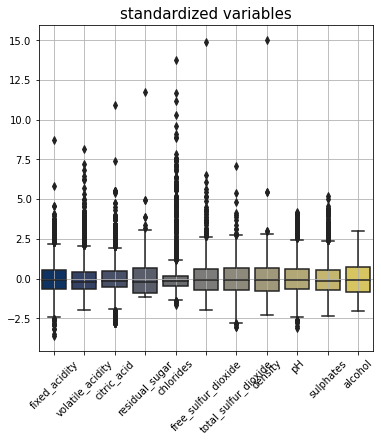

In [0]:
labels = df_X.loc[:, dependent_cols].columns

fig = plt.figure(figsize=(6,6))
ax = sns.boxplot(data=transformed_x, orient="v", palette="cividis")
ax.set_xticklabels(labels, rotation=45);
plt.title("standardized variables", fontsize=15)
ax.grid()

In [0]:
df_X.shape

(4898, 12)

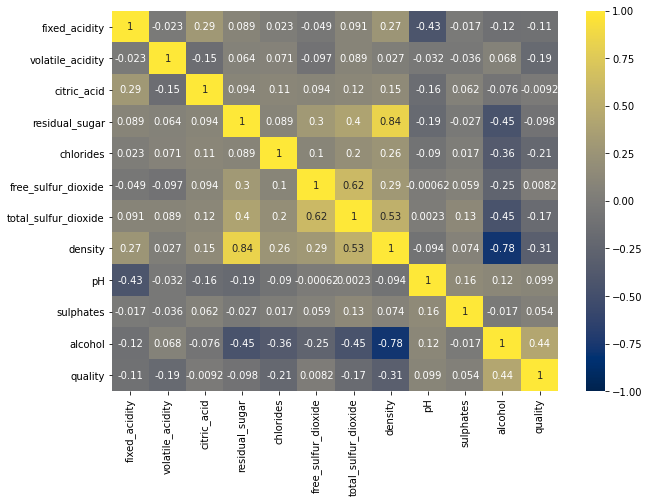

In [0]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_X.corr(), annot=True,vmin=-1, vmax=1,center= 0, cmap='cividis')
plt.show()

In [0]:
#definição de variáveis
y_var = 'quality'
x_var = dependent_cols

## Regressão linear - scikit learn

In [0]:
y = df_X[y_var]
x = df_X[x_var]

reg = LinearRegression()
model_skt = reg.fit(x,y)

In [0]:
#previsão e resíduo
pred = model_skt.predict(x)
resid = y - pred

In [0]:
#coeficientes
list(zip(x.columns, np.around(model_skt.coef_, 4)))

[('fixed_acidity', 0.0553),
 ('volatile_acidity', -0.1878),
 ('citric_acid', 0.0027),
 ('residual_sugar', 0.4132),
 ('chlorides', -0.0054),
 ('free_sulfur_dioxide', 0.0635),
 ('total_sulfur_dioxide', -0.0121),
 ('density', -0.4494),
 ('pH', 0.1036),
 ('sulphates', 0.0721),
 ('alcohol', 0.2381)]

In [0]:
print('intercept model:', round(model_skt.intercept_, 4))

intercept model: 5.8779


In [0]:
#coeficiente de determinação - r2
print('r2:', round(r2_score(y, pred),3))

r2: 0.282


### Algumas premissas do modelo

In [0]:
print('mean resid:', round(resid.mean(),3))
print('std resid:', round(resid.std(),3))

mean resid: -0.0
std resid: 0.751


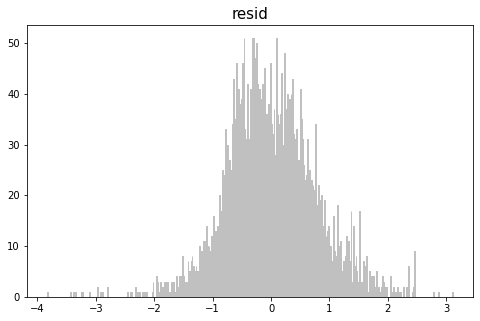

In [0]:
#normalidade do resíduo
plt.figure(figsize=(8,5))
plt.hist(resid,bins=500,edgecolor='silver')
plt.title("resid",fontsize=15)
plt.show()

In [0]:
print('skew:', round(skew(resid),3))

skew: 0.073


In [0]:
print('kurtosis:', round(kurtosis(resid, fisher=False),3))
print('kurtosis fisher:', round(kurtosis(resid),3))

kurtosis: 4.101
kurtosis fisher: 1.101


In [0]:
print('jarque bera test:', round(jarque_bera(resid)[0],3))
print('p jarque bera:', jarque_bera(resid)[1])

jarque bera test: 251.637
p jarque bera: 0.0


In [0]:
print('normaltest:', round(normaltest(resid)[0],3))
print('p normaltest:', round(normaltest(resid)[1],3))

normaltest: 114.161
p normaltest: 0.0


## Regressão linear - statsmodels

In [0]:
y = df_X[y_var]
x = df_X[x_var]
x = sm.add_constant(x)

model_sm = sm.OLS(y,x).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:38:28   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8779      0.011    547.502      0.000       5.857       5.899
fixed_acidity            0.0553      0.018      3.139      0.002       0.021       0.090
volatile_acidity        -0.1878      0.011    -16.373      0.000      -0.210      -0.165
citric_acid              0.0027      0.012      0.231      0.818      -0.020       0.025
residual_sugar           0.4132      0.038     10.825      0.000       0.338       0.488
chlorides               -0.0054      0.012     -0.452      0.651      -0.029       0.018
free_sulfur_dioxide      0.0635      0.014      4.422      0.000       0.035       0.092
total_sulfur_dioxide    -0.0121      0.016     -0.756      0.450      -0.044       0.019
density                 -0.4494      0.057     -7.879      0.000      -0.561      -0.338
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.0721      0.011      6.291      0.000       0.050       0.095
alcohol                  0.2381      0.030      7.988      0.000       0.180       0.297
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

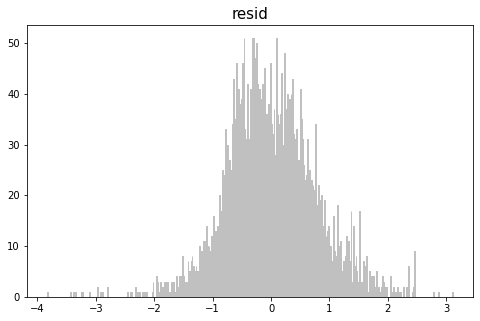

In [0]:
plt.figure(figsize=(8,5))
plt.hist(model_sm.resid,bins=500,edgecolor='silver')
plt.title("resid",fontsize=15)
plt.show()

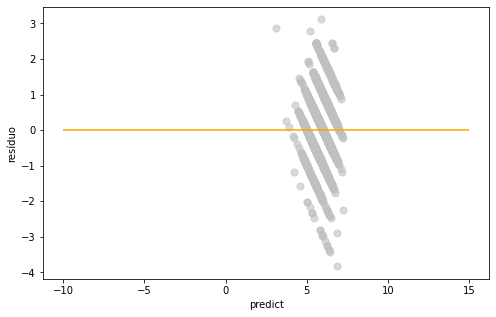

In [0]:
#vis homocedasticidade
plt.figure(figsize=(8,5))
plt.scatter(y=model_sm.resid, x=model_sm.predict(x), color='silver', s=50, alpha=.6)
plt.hlines(y=0, xmin=-10, xmax=15, color='orange')
plt.ylabel('resíduo')
plt.xlabel('predict')
plt.show()

In [0]:
#teste de homocedasticidade
print('goldfeld quandt test:', round(sms.het_goldfeldquandt(model_sm.resid, 
                                                            model_sm.model.exog)[0],3))
print('p goldfeld quandt:', sms.het_goldfeldquandt(model_sm.resid, 
                                                   model_sm.model.exog)[1])

goldfeld quandt test: 0.823
p goldfeld quandt: 0.9999992624556044


In [0]:
#vif - multicolinearidade
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x.columns.drop('const'))

def highlight_max(s):
  is_max = s > 10
  return ['background-color: orange' if v else '' for v in is_max]

vif_df.style.apply(highlight_max)

,vif
fixed_acidity,2.691435
volatile_acidity,1.141156
citric_acid,1.165215
residual_sugar,12.644064
chlorides,1.236822
free_sulfur_dioxide,1.787880
total_sulfur_dioxide,2.239233
density,28.232546
pH,2.196362
sulphates,1.138540


In [0]:
#removendo variável 'density'
x_var = x_var.drop('density')

In [0]:
y = df_X[y_var]
x = df_X[x_var]
x = sm.add_constant(x)

model_sm = sm.OLS(y,x).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     183.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:38:30   Log-Likelihood:                -5574.7
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8779      0.011    544.113      0.000       5.857       5.899
fixed_acidity           -0.0425      0.013     -3.375      0.001      -0.067      -0.018
volatile_acidity        -0.1974      0.011    -17.200      0.000      -0.220      -0.175
citric_acid             -0.0035      0.012     -0.301      0.763      -0.026       0.019
residual_sugar           0.1301      0.013     10.049      0.000       0.105       0.155
chlorides               -0.0208      0.012     -1.756      0.079      -0.044       0.002
free_sulfur_dioxide      0.0811      0.014      5.682      0.000       0.053       0.109
total_sulfur_dioxide    -0.0370      0.016     -2.331      0.020      -0.068      -0.006
pH                       0.0249      0.012      2.001      0.045       0.001       0.049
sulphates                0.0479      0.011      4.309      0.000       0.026       0.070
alcohol                  0.4463      0.014     32.190      0.000       0.419       0.473
==============================================================================
Omnibus:                      108.848   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.178
Skew:                           0.065   Prob(JB):                     5.18e-52
Kurtosis:                       4.068   Cond. No.                         2.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Removendo variáveis pelo p-valor

In [0]:
variables = x_var
target = y_var
pvalue_limit_number = 0.05

while len(variables) > 0:
  y = df_X[y_var]
  x = df_X[variables]
  x = sm.add_constant(x)
  model_sm = sm.OLS(y, x).fit()
  var_model = model_sm.pvalues.drop('const', axis=0)
  df_pvalue = pd.DataFrame(var_model, columns=['valor'])
  pvalue_max = df_pvalue.loc[df_pvalue.valor > pvalue_limit_number]
  var_max = pvalue_max.index
  if len(var_max) > 0:
    variables = variables.drop(var_max)
  else:
    break

In [0]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     228.6
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:38:31   Log-Likelihood:                -5576.3
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4889   BIC:                         1.123e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8779      0.011    544.038      0.000       5.857       5.899
fixed_acidity           -0.0422      0.012     -3.461      0.001      -0.066      -0.018
volatile_acidity        -0.1988      0.011    -17.665      0.000      -0.221      -0.177
residual_sugar           0.1327      0.013     10.349      0.000       0.108       0.158
free_sulfur_dioxide      0.0808      0.014      5.662      0.000       0.053       0.109
total_sulfur_dioxide    -0.0387      0.016     -2.445      0.015      -0.070      -0.008
pH                       0.0271      0.012      2.184      0.029       0.003       0.051
sulphates                0.0474      0.011      4.273      0.000       0.026       0.069
alcohol                  0.4543      0.013     34.834      0.000       0.429       0.480
==============================================================================
Omnibus:                      108.709   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.304
Skew:                           0.067   Prob(JB):                     8.02e-52
Kurtosis:                       4.065   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""